In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime, timedelta

In [14]:
data = pd.read_csv('D:\Projects\Project1\dataset\Aligarh.csv')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Suvercha Yadav\AppData\Local\Temp\ipykernel_45316\7338968.py:1: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv('D:\Projects\Project1\dataset\Aligarh.csv')


In [15]:
data['date'] = pd.to_datetime(data['date'])


In [16]:
data = data.sort_values('date')

In [17]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['temperature_2m', 'relative_humidity_2m', 'rain']])

In [18]:
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :]  
        X.append(a)
        y.append(dataset[i + time_step, :])  
    return np.array(X), np.array(y)

In [19]:
time_step = 30  
X, y = create_dataset(scaled_data, time_step)

In [20]:
train_size = int(len(X) * 0.8)  
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [22]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 3)))  
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(3))  # 3 output values (Temp, Humidity, Rain)

d:\Projects\Project1\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [26]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
3098/3098 ━━━━━━━━━━━━━━━━━━━━ 51s 16ms/step - loss: 0.0076 - val_loss: 9.1863e-04
Epoch 2/50
3098/3098 ━━━━━━━━━━━━━━━━━━━━ 48s 16ms/step - loss: 9.5098e-04 - val_loss: 7.9900e-04
Epoch 3/50
3098/3098 ━━━━━━━━━━━━━━━━━━━━ 54s 18ms/step - loss: 8.6648e-04 - val_loss: 7.2086e-04
Epoch 4/50
3098/3098 ━━━━━━━━━━━━━━━━━━━━ 77s 25ms/step - loss: 8.3224e-04 - val_loss: 6.6950e-04
Epoch 5/50
3098/3098 ━━━━━━━━━━━━━━━━━━━━ 85s 27ms/step - loss: 7.8918e-04 - val_loss: 7.5007e-04
Epoch 6/50
3098/3098 ━━━━━━━━━━━━━━━━━━━━ 88s 29ms/step - loss: 7.5961e-04 - val_loss: 6.4203e-04
Epoch 7/50
3098/3098 ━━━━━━━━━━━━━━━━━━━━ 93s 30ms/step - loss: 7.2953e-04 - val_loss: 6.2081e-04
Epoch 8/50
3098/3098 ━━━━━━━━━━━━━━━━━━━━ 77s 25ms/step - loss: 7.2373e-04 - val_loss: 6.2467e-04
Epoch 9/50
3098/3098 ━━━━━━━━━━━━━━━━━━━━ 74s 24ms/step - loss: 7.0310e-04 - val_loss: 7.1581e-04
Epoch 10/50
3098/3098 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - loss: 7.0575e-04 - val_loss: 6.5782e-04
Epoch 11/50
3098/3098 ━

In [27]:
model.save('crop.h5')

In [28]:
from tensorflow.keras.models import load_model

model = load_model('D:\Projects\Project1\jupyter\crop.h5')


<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Suvercha Yadav\AppData\Local\Temp\ipykernel_45316\3626901492.py:3: SyntaxWarning: invalid escape sequence '\P'
  model = load_model('D:\Projects\Project1\jupyter\crop.h5')


In [29]:
import pickle

with open('history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [30]:
with open('history.pkl', 'rb') as file:
    history = pickle.load(file)


In [31]:
y_pred = model.predict(X_test)

775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [32]:
y_test_inverse = scaler.inverse_transform(y_test)
y_pred_inverse = scaler.inverse_transform(y_pred)

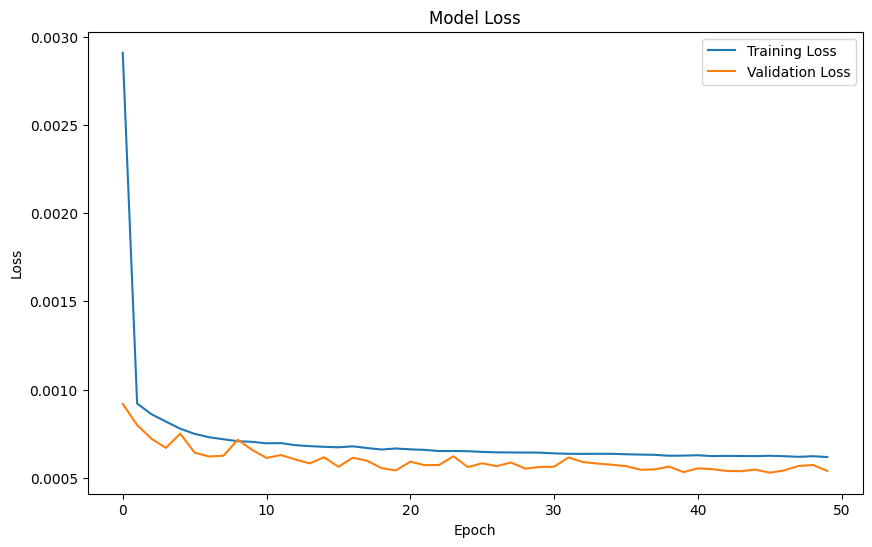

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

In [35]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.9072751437732077
Mean Squared Error (MSE): 3.731753470406531
Root Mean Squared Error (RMSE): 1.931774694524838
R² Score: 0.7715820166331824


In [36]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Avoid division by zero or small values by replacing zero values with a small number (epsilon)
    epsilon = np.finfo(float).eps  # Smallest representable positive number
    y_true = np.where(y_true == 0, epsilon, y_true)
    
    # Calculate MAPE only where the true value is not zero
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [37]:
y_test_temp_hum = y_test_inverse[:, :2]  # Select Temperature and Humidity columns only
y_pred_temp_hum = y_pred_inverse[:, :2]

mape = mean_absolute_percentage_error(y_test_temp_hum, y_pred_temp_hum)
accuracy = 100 - mape

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")


Mean Absolute Percentage Error (MAPE): 3.21%
Accuracy: 96.79%


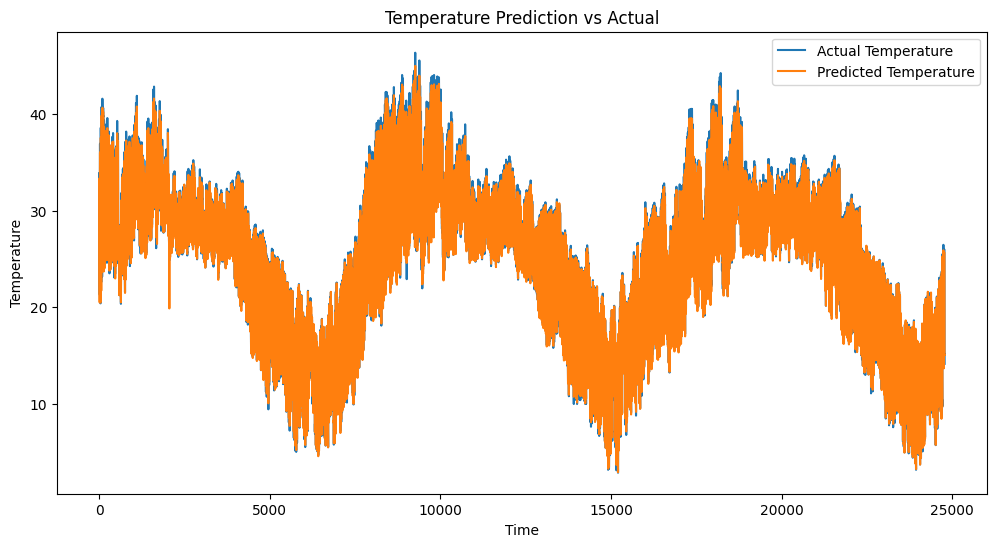

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse[:, 0], label='Actual Temperature')
plt.plot(y_pred_inverse[:, 0], label='Predicted Temperature')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

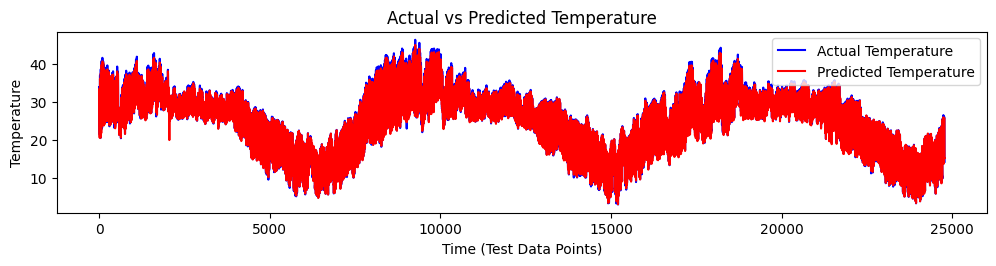

In [25]:
plt.figure(figsize=(12, 8))

# Temperature plot
plt.subplot(3, 1, 1)
plt.plot(y_test_inverse[:, 0], label="Actual Temperature", color='blue')
plt.plot(y_pred_inverse[:, 0], label="Predicted Temperature", color='red')
plt.title("Actual vs Predicted Temperature")
plt.xlabel("Time (Test Data Points)")
plt.ylabel("Temperature")
plt.legend()

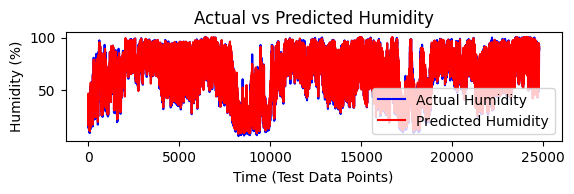

In [26]:
#humidity plot
plt.subplot(3, 1, 2)
plt.plot(y_test_inverse[:, 1], label="Actual Humidity", color='blue')
plt.plot(y_pred_inverse[:, 1], label="Predicted Humidity", color='red')
plt.title("Actual vs Predicted Humidity")
plt.xlabel("Time (Test Data Points)")
plt.ylabel("Humidity (%)")
plt.legend()

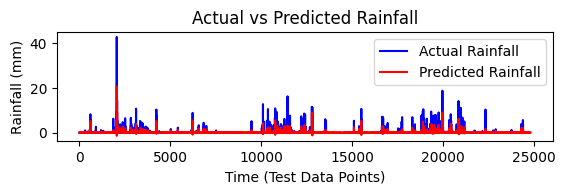

In [27]:
# Rainfall plot
plt.subplot(3, 1, 3)
plt.plot(y_test_inverse[:, 2], label="Actual Rainfall", color='blue')
plt.plot(y_pred_inverse[:, 2], label="Predicted Rainfall", color='red')
plt.title("Actual vs Predicted Rainfall")
plt.xlabel("Time (Test Data Points)")
plt.ylabel("Rainfall (mm)")
plt.legend()

In [38]:
import numpy as np

def display_actual_vs_predicted(scaler, model, X_test, y_test):
    # Make predictions using the model on test data
    y_pred = model.predict(X_test)
    
    # Inverse the scaling to get actual values
    y_pred = scaler.inverse_transform(y_pred)
    y_test = scaler.inverse_transform(y_test)

    # Display a few predictions vs actual values for comparison
    print('Displaying the first 5 predictions vs actual values:')
    for i in range(5):
        print(f"Prediction {i+1}:")
        print(f"Predicted - Temperature: {y_pred[i][0]:.2f}°C, Humidity: {y_pred[i][1]:.2f}%, Rain: {y_pred[i][2]:.2f} mm")
        print(f"Actual    - Temperature: {y_test[i][0]:.2f}°C, Humidity: {y_test[i][1]:.2f}%, Rain: {y_test[i][2]:.2f} mm")
        print("-" * 60)


In [39]:
# Assuming your test data and scaler are already defined
display_actual_vs_predicted(scaler, model, X_test, y_test)

775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Displaying the first 5 predictions vs actual values:
Prediction 1:
Predicted - Temperature: 33.55°C, Humidity: 17.90%, Rain: -0.06 mm
Actual    - Temperature: 33.86°C, Humidity: 16.14%, Rain: 0.00 mm
------------------------------------------------------------
Prediction 2:
Predicted - Temperature: 32.95°C, Humidity: 17.62%, Rain: -0.07 mm
Actual    - Temperature: 33.56°C, Humidity: 15.47%, Rain: 0.00 mm
------------------------------------------------------------
Prediction 3:
Predicted - Temperature: 32.36°C, Humidity: 17.50%, Rain: -0.06 mm
Actual    - Temperature: 32.41°C, Humidity: 19.57%, Rain: 0.00 mm
------------------------------------------------------------
Prediction 4:
Predicted - Temperature: 30.25°C, Humidity: 24.81%, Rain: -0.02 mm
Actual    - Temperature: 30.56°C, Humidity: 21.89%, Rain: 0.00 mm
------------------------------------------------------------
Prediction 5:
Predicted - Temperature: 27.93°C, Humidity: 26.18%, Rain: -0

In [40]:
from datetime import timedelta

def predict_future(user_date, scaler, model, original_data, time_step=30):
    user_date = pd.to_datetime(user_date)
    last_date = original_data['date'].max()  
    
    last_date = last_date.tz_localize(None)

    days_to_predict = (user_date - last_date).days

    if days_to_predict <= 0:
        raise ValueError("The date you are trying to predict is before or equal to the last date in the dataset.")

    latest_data = original_data.tail(time_step)

    scaled_latest_data = scaler.transform(latest_data[['temperature_2m', 'relative_humidity_2m', 'rain']])

    X_input = scaled_latest_data.reshape(1, time_step, 3)

    predicted_values = []
    for i in range(days_to_predict):
        prediction = model.predict(X_input)
        predicted_values.append(prediction)

        X_input = np.append(X_input[:, 1:, :], prediction.reshape(1, 1, 3), axis=1)

    final_prediction = predicted_values[-1]

    final_prediction_inverse = scaler.inverse_transform(final_prediction)

    future_temperature = final_prediction_inverse[0][0]
    future_humidity = final_prediction_inverse[0][1]
    future_rain = final_prediction_inverse[0][2]

    return future_temperature, future_humidity, future_rain



In [41]:
user_date = "2024-08-08"
temp, hum, rain = predict_future(user_date, scaler, model, data, time_step)
print(f"Predicted Temperature on {user_date}: {temp}")
print(f"Predicted Humidity on {user_date}: {hum}")
if(rain<0):
    rain=0
print(f"Predicted Rain on {user_date}: {rain}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

In [42]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import pickle

weather_data = pd.read_csv(r'D:\Projects\Project1\dataset\Aligarh.csv')  # Assuming it has columns: 'temperature_2m', 'relative_humidity_2m', 'rain'

weather_features = weather_data[['temperature_2m', 'relative_humidity_2m', 'rain']]

# Initialize a MinMaxScaler
weather_scaler = MinMaxScaler()

# Fit the scaler on the weather features
weather_scaler.fit(weather_features)

# Optionally, save the scaler to use later
with open('weather_scaler.pkl', 'wb') as f:
    pickle.dump(weather_scaler, f)

print("Weather data scaler created and saved successfully!")


Weather data scaler created and saved successfully!


In [43]:
from tensorflow.keras.models import load_model
import pickle
import numpy as np
import pandas as pd


# Load the trained models
with open('D:/Projects/Project1/jupyter/random_forest_crop_recommendation_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

lstm_model = load_model('D:/Projects/Project1/jupyter/crop.h5')

# Load the scaler used for weather data normalization
with open('D:/Projects/Project1/jupyter/weather_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [44]:
# Predict future weather features function (already working fine)
from datetime import timedelta

def predict_future(user_date, scaler, model, original_data, time_step=30):
    user_date = pd.to_datetime(user_date)
    last_date = original_data['date'].max()  
    last_date = last_date.tz_localize(None)

    days_to_predict = (user_date - last_date).days

    if days_to_predict <= 0:
        raise ValueError("The date you are trying to predict is before or equal to the last date in the dataset.")

    latest_data = original_data.tail(time_step)

    scaled_latest_data = scaler.transform(latest_data[['temperature_2m', 'relative_humidity_2m', 'rain']])

    X_input = scaled_latest_data.reshape(1, time_step, 3)
    predicted_values = []
    for i in range(days_to_predict):
        # Make a prediction for the next day
        prediction = model.predict(X_input)
        predicted_values.append(prediction)

        # Use the predicted value as the new input
        X_input = np.append(X_input[:, 1:, :], prediction.reshape(1, 1, 3), axis=1)

    final_prediction = predicted_values[-1]

    final_prediction_inverse = scaler.inverse_transform(final_prediction)

    future_temperature = final_prediction_inverse[0][0]
    future_humidity = final_prediction_inverse[0][1]
    future_rain = final_prediction_inverse[0][2]

    return future_temperature, future_humidity, future_rain


# Function to recommend crop based on N, P, K, pH, and predicted weather values
def recommend_crop(n, p, k, ph, date, scaler, lstm_model, original_data, rf_model, time_step=30):
    temperature, humidity, rainfall = predict_future(date, scaler, lstm_model, original_data, time_step)
    input_features = np.array([[n, p, k, temperature, humidity, ph]])

    predicted_crop = rf_model.predict(input_features)[0]

    return predicted_crop

In [45]:
# Example user inputs
n = 50 # Nitrogen input
p = 30  # Phosphorus input
k = 28  # Potassium input
ph = 6.8  # pH level
date = "2024-07-08"  # The date for which weather needs to be predicted

# Make sure your `data` contains the historical weather data
try:
    predicted_crop = recommend_crop(n, p, k, ph, date, scaler, lstm_model, data, rf_model)
    print(f"Recommended Crop for the given inputs is: {predicted_crop}")
except ValueError as e:
    print(e)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━

d:\Projects\Project1\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
